In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt 
from numpy.polynomial.polynomial import polyfit
from scipy import optimize

In [2]:
with open("airline_delay.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    data = [r for r in reader]

NUM = len(data)

#print NUM

totalyear=17
totalmonth = 12
delay_causes = 7

company_list =[]

for n in range (0,NUM):
  s=data[n]['carrier']
  if not s in company_list:
    company_list.append(s)

print(company_list)

#company_num = len(company_list)

year_plot = np.array(range(2003, 2020))
month_plot = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

delay_year_ORD = np.zeros((totalyear, delay_causes+1))
delay_year_JFK = np.zeros((totalyear, delay_causes+1))
delay_year_DFW = np.zeros((totalyear, delay_causes+1))
delay_year_ORD_AA = np.zeros((totalyear, delay_causes+1))

for n in range (0,NUM):
    company_index = company_list.index(data[n]['carrier'])
    year_index = int(data[n]['year'])-2003

    if (data[n]['arr_cancelled'] and data[n]['airport'] == 'ORD'):
        delay_year_ORD[year_index][0] += float(data[n]['carrier_ct'])
        delay_year_ORD[year_index][1] += float(data[n]['weather_ct'])
        delay_year_ORD[year_index][2] += float(data[n]['nas_ct'])
        delay_year_ORD[year_index][3] += float(data[n]['security_ct'])
        delay_year_ORD[year_index][4] += float(data[n]['late_aircraft_ct'])
        delay_year_ORD[year_index][5] += float(data[n]['arr_cancelled'])
        delay_year_ORD[year_index][6] += float(data[n]['arr_diverted'])
        delay_year_ORD[year_index][7] += float(data[n]['arr_flights'])

    if (data[n]['arr_cancelled'] and data[n]['airport'] == 'JFK'):
        delay_year_JFK[year_index][0] += float(data[n]['carrier_ct'])
        delay_year_JFK[year_index][1] += float(data[n]['weather_ct'])
        delay_year_JFK[year_index][2] += float(data[n]['nas_ct'])
        delay_year_JFK[year_index][3] += float(data[n]['security_ct'])
        delay_year_JFK[year_index][4] += float(data[n]['late_aircraft_ct'])
        delay_year_JFK[year_index][5] += float(data[n]['arr_cancelled'])
        delay_year_JFK[year_index][6] += float(data[n]['arr_diverted'])
        delay_year_JFK[year_index][7] += float(data[n]['arr_flights'])

    if (data[n]['arr_cancelled'] and data[n]['airport'] == 'DFW'):
        delay_year_DFW[year_index][0] += float(data[n]['carrier_ct'])
        delay_year_DFW[year_index][1] += float(data[n]['weather_ct'])
        delay_year_DFW[year_index][2] += float(data[n]['nas_ct'])
        delay_year_DFW[year_index][3] += float(data[n]['security_ct'])
        delay_year_DFW[year_index][4] += float(data[n]['late_aircraft_ct'])
        delay_year_DFW[year_index][5] += float(data[n]['arr_cancelled'])
        delay_year_DFW[year_index][6] += float(data[n]['arr_diverted'])
        delay_year_DFW[year_index][7] += float(data[n]['arr_flights'])

    if (data[n]['arr_cancelled'] and data[n]['airport'] == 'ORD' and data[n]['carrier'] == 'AA'):
        delay_year_ORD_AA[year_index][0] += float(data[n]['carrier_ct'])
        delay_year_ORD_AA[year_index][1] += float(data[n]['weather_ct'])
        delay_year_ORD_AA[year_index][2] += float(data[n]['nas_ct'])
        delay_year_ORD_AA[year_index][3] += float(data[n]['security_ct'])
        delay_year_ORD_AA[year_index][4] += float(data[n]['late_aircraft_ct'])
        delay_year_ORD_AA[year_index][5] += float(data[n]['arr_cancelled'])
        delay_year_ORD_AA[year_index][6] += float(data[n]['arr_diverted'])
        delay_year_ORD_AA[year_index][7] += float(data[n]['arr_flights'])


plot_ORD_list = [[] for x in range(delay_causes+1)]
plot_JFK_list = [[] for x in range(delay_causes+1)]
plot_DFW_list = [[] for x in range(delay_causes+1)]
plot_ORD_AA_list = [[] for x in range(delay_causes+1)]

for cause in range (0,delay_causes+1):
    for year in range (0, totalyear):
        plot_ORD_list[cause].append(delay_year_ORD[year][cause])

for cause in range (0,delay_causes+1):
    for year in range (0, totalyear):
        plot_JFK_list[cause].append(delay_year_JFK[year][cause])

for cause in range (0,delay_causes+1):
    for year in range (0, totalyear):
        plot_DFW_list[cause].append(delay_year_DFW[year][cause])

for cause in range (0,delay_causes+1):
    for year in range (0, totalyear):
        plot_ORD_AA_list[cause].append(delay_year_ORD_AA[year][cause])

#print(delay_year_ORD)

for year in range (0,totalyear):
    total_number_oneyear = plot_ORD_list[7][year]
    for cause in range (0,delay_causes):
        plot_ORD_list[cause][year] = plot_ORD_list[cause][year]* 100/total_number_oneyear


for year in range (0,totalyear):
    total_number_oneyear = plot_JFK_list[7][year]
    for cause in range (0,delay_causes):
        plot_JFK_list[cause][year] = plot_JFK_list[cause][year]* 100/total_number_oneyear


for year in range (0,totalyear):
    total_number_oneyear = plot_DFW_list[7][year]
    for cause in range (0,delay_causes):
        plot_DFW_list[cause][year] = plot_DFW_list[cause][year]* 100/total_number_oneyear

for year in range (0,totalyear):
    total_number_oneyear = plot_ORD_AA_list[7][year]
    for cause in range (0,delay_causes):
        plot_ORD_AA_list[cause][year] = plot_ORD_AA_list[cause][year]* 100/total_number_oneyear


['AA', 'AS', 'B6', 'CO', 'DH', 'DL', 'EV', 'FL', 'HP', 'MQ', 'NW', 'OO', 'RU', 'TZ', 'UA', 'US', 'WN', 'HA', 'OH', 'F9', 'YV', 'AQ', 'XE', '9E', 'VX', 'NK', 'YX', 'G4']


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


slopes for carrier, nas and late aircraft delays: 0.021618718115545797 -0.42256112158917586 0.07588326421662892


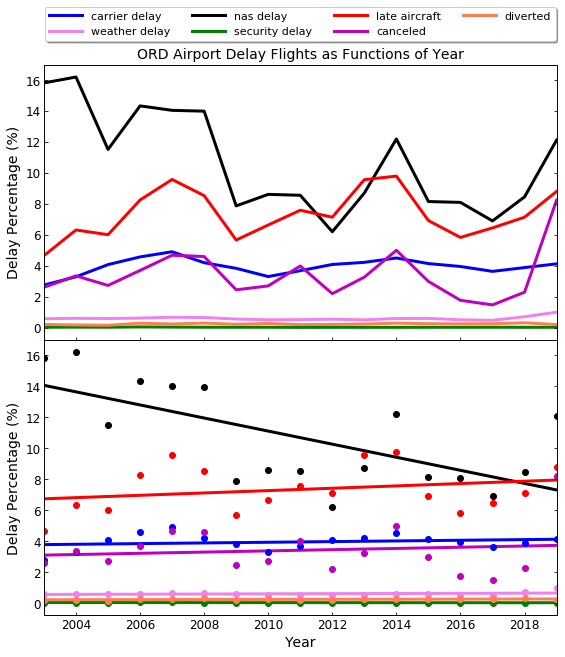

In [3]:
fig11 = plt.figure(figsize=(8,9))

ax1 = fig11.add_subplot(211)

ax1.plot(year_plot,plot_ORD_list[0],linewidth=3,color='b')
ax1.plot(year_plot,plot_ORD_list[1],linewidth=3,color='violet')
ax1.plot(year_plot,plot_ORD_list[2],linewidth=3,color='black')
ax1.plot(year_plot,plot_ORD_list[3],linewidth=3,color='green')
ax1.plot(year_plot,plot_ORD_list[4],linewidth=3,color='red')
ax1.plot(year_plot,plot_ORD_list[5],linewidth=3,color='m')
ax1.plot(year_plot,plot_ORD_list[6],linewidth=3,color='coral')
ax1.xaxis.set_tick_params(labelsize=12,direction='in')
ax1.yaxis.set_tick_params(labelsize=12,direction='in')
ax1.legend(['carrier delay','weather delay','nas delay','security delay','late aircraft','canceled','diverted'], fontsize=11,handlelength=3,
    frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.23),fancybox=True, shadow=True, ncol=4)
ax1.set_ylabel('Delay Percentage (%)',fontsize=14)
ax1.set_xlim([2003,2019])
ax11 = ax1.twinx()
ax11.set_ylim(ax1.get_ylim())
ax11.get_yaxis().set_tick_params(direction='in',labelright='False')
plt.setp(ax1.get_xticklabels(),visible=False)
plt.title('ORD Airport Delay Flights as Functions of Year',fontsize=14)


plt.subplots_adjust(hspace=0)

ax2 = fig11.add_subplot(212)

b0, m0 = polyfit(year_plot, plot_ORD_list[0], 1)
b1, m1 = polyfit(year_plot, plot_ORD_list[1], 1)
b2, m2 = polyfit(year_plot, plot_ORD_list[2], 1)
b3, m3 = polyfit(year_plot, plot_ORD_list[3], 1)
b4, m4 = polyfit(year_plot, plot_ORD_list[4], 1)
b5, m5 = polyfit(year_plot, plot_ORD_list[5], 1)
b6, m6 = polyfit(year_plot, plot_ORD_list[6], 1)

print(('slopes for carrier, nas and late aircraft delays:'), m0,m2,m4)

ax2.plot(year_plot, b0 + m0 * year_plot, linewidth=3,color='b')
ax2.plot(year_plot, b1 + m1 * year_plot, linewidth=3,color='violet')
ax2.plot(year_plot, b2 + m2 * year_plot, linewidth=3,color='k')
ax2.plot(year_plot, b3 + m3 * year_plot, linewidth=3,color='g')
ax2.plot(year_plot, b4 + m4 * year_plot, linewidth=3,color='red')
ax2.plot(year_plot, b5 + m5 * year_plot, linewidth=3,color='m')
ax2.plot(year_plot, b6 + m6 * year_plot, linewidth=3,color='coral')

ax2.plot(year_plot,plot_ORD_list[0],'o',color='b')
ax2.plot(year_plot,plot_ORD_list[1],'o',color='violet')
ax2.plot(year_plot,plot_ORD_list[2],'o',color='black')
ax2.plot(year_plot,plot_ORD_list[3],'o',color='green')
ax2.plot(year_plot,plot_ORD_list[4],'o',color='red')
ax2.plot(year_plot,plot_ORD_list[5],'o',color='m')
ax2.plot(year_plot,plot_ORD_list[6],'o',color='coral')
ax2.xaxis.set_tick_params(labelsize=12,direction='in')
ax2.yaxis.set_tick_params(labelsize=12,direction='in')
ax2.set_xlabel('Year',fontsize=14)
ax2.set_ylabel('Delay Percentage (%)',fontsize=14)
ax2.set_xlim([2003,2019])
ax21 = ax2.twinx()
ax21.set_ylim(ax2.get_ylim())
ax21.get_yaxis().set_tick_params(direction='in',labelright='False')

fig11.subplots_adjust(left=0.08,right=0.97,bottom=0.05,top=0.9)

#plt.savefig('delay_year_ORD.pdf', format='pdf')

slopes for carrier, nas and late aircraft delays: -0.01918661531846686 -0.28463231709895503 0.06099870945791908


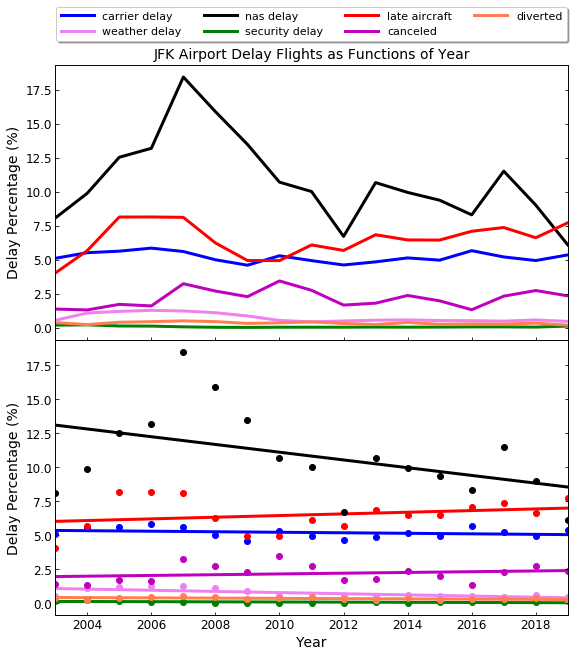

In [4]:
fig12 = plt.figure(figsize=(8,9))

ax1 = fig12.add_subplot(211)

ax1.plot(year_plot,plot_JFK_list[0],linewidth=3,color='b')
ax1.plot(year_plot,plot_JFK_list[1],linewidth=3,color='violet')
ax1.plot(year_plot,plot_JFK_list[2],linewidth=3,color='black')
ax1.plot(year_plot,plot_JFK_list[3],linewidth=3,color='green')
ax1.plot(year_plot,plot_JFK_list[4],linewidth=3,color='red')
ax1.plot(year_plot,plot_JFK_list[5],linewidth=3,color='m')
ax1.plot(year_plot,plot_JFK_list[6],linewidth=3,color='coral')
ax1.xaxis.set_tick_params(labelsize=12,direction='in')
ax1.yaxis.set_tick_params(labelsize=12,direction='in')
ax1.legend(['carrier delay','weather delay','nas delay','security delay','late aircraft','canceled','diverted'], fontsize=11,handlelength=3,
    frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.23),fancybox=True, shadow=True, ncol=4)
ax1.set_ylabel('Delay Percentage (%)',fontsize=14)
ax1.set_xlim([2003,2019])
ax11 = ax1.twinx()
ax11.set_ylim(ax1.get_ylim())
ax11.get_yaxis().set_tick_params(direction='in',labelright='False')
plt.setp(ax1.get_xticklabels(),visible=False)
plt.title('JFK Airport Delay Flights as Functions of Year',fontsize=14)


plt.subplots_adjust(hspace=0)

ax2 = fig12.add_subplot(212)

b0, m0 = polyfit(year_plot, plot_JFK_list[0], 1)
b1, m1 = polyfit(year_plot, plot_JFK_list[1], 1)
b2, m2 = polyfit(year_plot, plot_JFK_list[2], 1)
b3, m3 = polyfit(year_plot, plot_JFK_list[3], 1)
b4, m4 = polyfit(year_plot, plot_JFK_list[4], 1)
b5, m5 = polyfit(year_plot, plot_JFK_list[5], 1)
b6, m6 = polyfit(year_plot, plot_JFK_list[6], 1)

print(('slopes for carrier, nas and late aircraft delays:'), m0,m2,m4)

ax2.plot(year_plot, b0 + m0 * year_plot, linewidth=3,color='b')
ax2.plot(year_plot, b1 + m1 * year_plot, linewidth=3,color='violet')
ax2.plot(year_plot, b2 + m2 * year_plot, linewidth=3,color='k')
ax2.plot(year_plot, b3 + m3 * year_plot, linewidth=3,color='g')
ax2.plot(year_plot, b4 + m4 * year_plot, linewidth=3,color='red')
ax2.plot(year_plot, b5 + m5 * year_plot, linewidth=3,color='m')
ax2.plot(year_plot, b6 + m6 * year_plot, linewidth=3,color='coral')

ax2.plot(year_plot,plot_JFK_list[0],'o',color='b')
ax2.plot(year_plot,plot_JFK_list[1],'o',color='violet')
ax2.plot(year_plot,plot_JFK_list[2],'o',color='black')
ax2.plot(year_plot,plot_JFK_list[3],'o',color='green')
ax2.plot(year_plot,plot_JFK_list[4],'o',color='red')
ax2.plot(year_plot,plot_JFK_list[5],'o',color='m')
ax2.plot(year_plot,plot_JFK_list[6],'o',color='coral')
ax2.xaxis.set_tick_params(labelsize=12,direction='in')
ax2.yaxis.set_tick_params(labelsize=12,direction='in')
ax2.set_xlabel('Year',fontsize=14)
ax2.set_ylabel('Delay Percentage (%)',fontsize=14)
ax2.set_xlim([2003,2019])
ax21 = ax2.twinx()
ax21.set_ylim(ax2.get_ylim())
ax21.get_yaxis().set_tick_params(direction='in',labelright='False')

fig12.subplots_adjust(left=0.08,right=0.97,bottom=0.05,top=0.9)

#plt.savefig('delay_year_JFK.pdf', format='pdf')

slopes for carrier, nas and late aircraft delays: 0.07246101810434952 -0.026606054904806803 0.08593458044534807


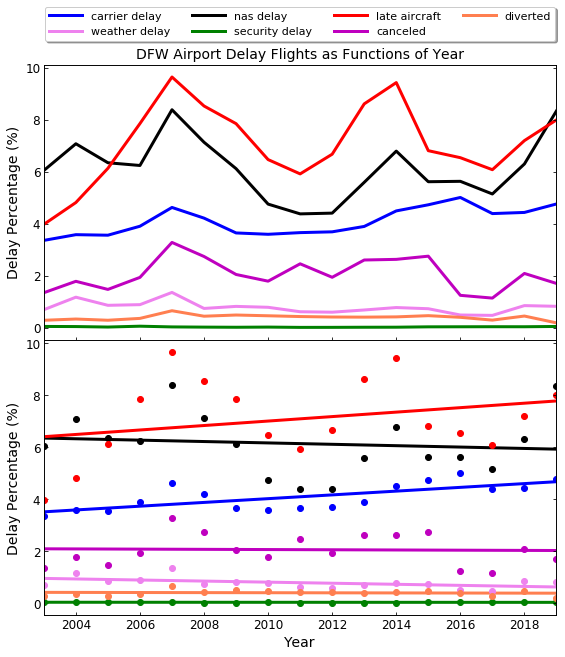

In [5]:
fig13 = plt.figure(figsize=(8,9))

ax1 = fig13.add_subplot(211)

ax1.plot(year_plot,plot_DFW_list[0],linewidth=3,color='b')
ax1.plot(year_plot,plot_DFW_list[1],linewidth=3,color='violet')
ax1.plot(year_plot,plot_DFW_list[2],linewidth=3,color='black')
ax1.plot(year_plot,plot_DFW_list[3],linewidth=3,color='green')
ax1.plot(year_plot,plot_DFW_list[4],linewidth=3,color='red')
ax1.plot(year_plot,plot_DFW_list[5],linewidth=3,color='m')
ax1.plot(year_plot,plot_DFW_list[6],linewidth=3,color='coral')
ax1.xaxis.set_tick_params(labelsize=12,direction='in')
ax1.yaxis.set_tick_params(labelsize=12,direction='in')
ax1.legend(['carrier delay','weather delay','nas delay','security delay','late aircraft','canceled','diverted'], fontsize=11,handlelength=3,
    frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.23),fancybox=True, shadow=True, ncol=4)
ax1.set_ylabel('Delay Percentage (%)',fontsize=14)
ax1.set_xlim([2003,2019])
ax11 = ax1.twinx()
ax11.set_ylim(ax1.get_ylim())
ax11.get_yaxis().set_tick_params(direction='in',labelright='False')
plt.setp(ax1.get_xticklabels(),visible=False)
plt.title('DFW Airport Delay Flights as Functions of Year',fontsize=14)


plt.subplots_adjust(hspace=0)

ax2 = fig13.add_subplot(212)

b0, m0 = polyfit(year_plot, plot_DFW_list[0], 1)
b1, m1 = polyfit(year_plot, plot_DFW_list[1], 1)
b2, m2 = polyfit(year_plot, plot_DFW_list[2], 1)
b3, m3 = polyfit(year_plot, plot_DFW_list[3], 1)
b4, m4 = polyfit(year_plot, plot_DFW_list[4], 1)
b5, m5 = polyfit(year_plot, plot_DFW_list[5], 1)
b6, m6 = polyfit(year_plot, plot_DFW_list[6], 1)

print(('slopes for carrier, nas and late aircraft delays:'), m0,m2,m4)

ax2.plot(year_plot, b0 + m0 * year_plot, linewidth=3,color='b')
ax2.plot(year_plot, b1 + m1 * year_plot, linewidth=3,color='violet')
ax2.plot(year_plot, b2 + m2 * year_plot, linewidth=3,color='k')
ax2.plot(year_plot, b3 + m3 * year_plot, linewidth=3,color='g')
ax2.plot(year_plot, b4 + m4 * year_plot, linewidth=3,color='red')
ax2.plot(year_plot, b5 + m5 * year_plot, linewidth=3,color='m')
ax2.plot(year_plot, b6 + m6 * year_plot, linewidth=3,color='coral')

ax2.plot(year_plot,plot_DFW_list[0],'o',color='b')
ax2.plot(year_plot,plot_DFW_list[1],'o',color='violet')
ax2.plot(year_plot,plot_DFW_list[2],'o',color='black')
ax2.plot(year_plot,plot_DFW_list[3],'o',color='green')
ax2.plot(year_plot,plot_DFW_list[4],'o',color='red')
ax2.plot(year_plot,plot_DFW_list[5],'o',color='m')
ax2.plot(year_plot,plot_DFW_list[6],'o',color='coral')
ax2.xaxis.set_tick_params(labelsize=12,direction='in')
ax2.yaxis.set_tick_params(labelsize=12,direction='in')
ax2.set_xlabel('Year',fontsize=14)
ax2.set_ylabel('Delay Percentage (%)',fontsize=14)
ax2.set_xlim([2003,2019])
ax21 = ax2.twinx()
ax21.set_ylim(ax2.get_ylim())
ax21.get_yaxis().set_tick_params(direction='in',labelright='False')

fig13.subplots_adjust(left=0.08,right=0.97,bottom=0.05,top=0.9)

#plt.savefig('delay_year_DFW.pdf', format='pdf')

slopes for carrier, nas and late aircraft delays: 0.08760962106174887 -0.6069610030449079 -0.0321044424904969


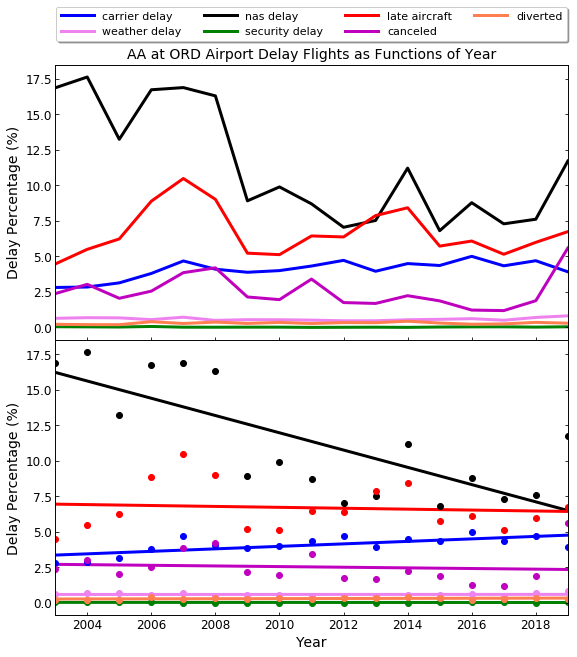

In [6]:
fig14 = plt.figure(figsize=(8,9))

ax1 = fig14.add_subplot(211)

ax1.plot(year_plot,plot_ORD_AA_list[0],linewidth=3,color='b')
ax1.plot(year_plot,plot_ORD_AA_list[1],linewidth=3,color='violet')
ax1.plot(year_plot,plot_ORD_AA_list[2],linewidth=3,color='black')
ax1.plot(year_plot,plot_ORD_AA_list[3],linewidth=3,color='green')
ax1.plot(year_plot,plot_ORD_AA_list[4],linewidth=3,color='red')
ax1.plot(year_plot,plot_ORD_AA_list[5],linewidth=3,color='m')
ax1.plot(year_plot,plot_ORD_AA_list[6],linewidth=3,color='coral')
ax1.xaxis.set_tick_params(labelsize=12,direction='in')
ax1.yaxis.set_tick_params(labelsize=12,direction='in')
ax1.legend(['carrier delay','weather delay','nas delay','security delay','late aircraft','canceled','diverted'], fontsize=11,handlelength=3,
    frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.23),fancybox=True, shadow=True, ncol=4)
ax1.set_ylabel('Delay Percentage (%)',fontsize=14)
ax1.set_xlim([2003,2019])
ax11 = ax1.twinx()
ax11.set_ylim(ax1.get_ylim())
ax11.get_yaxis().set_tick_params(direction='in',labelright='False')
plt.setp(ax1.get_xticklabels(),visible=False)
plt.title('AA at ORD Airport Delay Flights as Functions of Year',fontsize=14)


plt.subplots_adjust(hspace=0)

ax2 = fig14.add_subplot(212)

b0, m0 = polyfit(year_plot, plot_ORD_AA_list[0], 1)
b1, m1 = polyfit(year_plot, plot_ORD_AA_list[1], 1)
b2, m2 = polyfit(year_plot, plot_ORD_AA_list[2], 1)
b3, m3 = polyfit(year_plot, plot_ORD_AA_list[3], 1)
b4, m4 = polyfit(year_plot, plot_ORD_AA_list[4], 1)
b5, m5 = polyfit(year_plot, plot_ORD_AA_list[5], 1)
b6, m6 = polyfit(year_plot, plot_ORD_AA_list[6], 1)

print(('slopes for carrier, nas and late aircraft delays:'), m0,m2,m4)

ax2.plot(year_plot, b0 + m0 * year_plot, linewidth=3,color='b')
ax2.plot(year_plot, b1 + m1 * year_plot, linewidth=3,color='violet')
ax2.plot(year_plot, b2 + m2 * year_plot, linewidth=3,color='k')
ax2.plot(year_plot, b3 + m3 * year_plot, linewidth=3,color='g')
ax2.plot(year_plot, b4 + m4 * year_plot, linewidth=3,color='red')
ax2.plot(year_plot, b5 + m5 * year_plot, linewidth=3,color='m')
ax2.plot(year_plot, b6 + m6 * year_plot, linewidth=3,color='coral')

ax2.plot(year_plot,plot_ORD_AA_list[0],'o',color='b')
ax2.plot(year_plot,plot_ORD_AA_list[1],'o',color='violet')
ax2.plot(year_plot,plot_ORD_AA_list[2],'o',color='black')
ax2.plot(year_plot,plot_ORD_AA_list[3],'o',color='green')
ax2.plot(year_plot,plot_ORD_AA_list[4],'o',color='red')
ax2.plot(year_plot,plot_ORD_AA_list[5],'o',color='m')
ax2.plot(year_plot,plot_ORD_AA_list[6],'o',color='coral')
ax2.xaxis.set_tick_params(labelsize=12,direction='in')
ax2.yaxis.set_tick_params(labelsize=12,direction='in')
ax2.set_xlabel('Year',fontsize=14)
ax2.set_ylabel('Delay Percentage (%)',fontsize=14)
ax2.set_xlim([2003,2019])
ax21 = ax2.twinx()
ax21.set_ylim(ax2.get_ylim())
ax21.get_yaxis().set_tick_params(direction='in',labelright='False')

fig14.subplots_adjust(left=0.08,right=0.97,bottom=0.05,top=0.9)

#plt.savefig('delay_year_ORD_AA.pdf', format='pdf')